In [19]:
# !pip install pandas
import pandas as pd
import os

In [20]:
file_dir = "./rosdata/MPC/Init_angle_1.5707963267948966_seed_1_Nactor_4"
fn = os.listdir(file_dir)
fn = sorted(fn, key=lambda x: int(x.split(".")[0]))[-1]

file_path = os.path.join(
    file_dir,
    fn
)
with open(file_path) as f:
    data = f.read().splitlines()[20:]

data
fn

'1720702022.302621__3wrobotNI__MPC__2024-07-11__14h47m02s__run01.csv'

In [21]:
headers = data[0].split(",")
data_dict = {}
for line in data[1:]:
    line_info = line.split(",")
    for idx, header in enumerate(headers):
        if header not in data_dict:
            data_dict[header] = [float(line_info[idx])]
        else:
            data_dict[header].append(float(line_info[idx]))

df = pd.DataFrame(data_dict)
df

,t [s],x [m],y [m],alpha [rad],stage_obj,accum_obj,v [m/s],omega [rad/s]
0,1955.149,-1.002260,3.002937,-1.618964,94.813377,18.962675,0.22,0.949352
1,1955.266,-1.002260,3.002937,-1.618964,94.813377,37.925351,0.22,0.949352
2,1955.276,-1.002260,3.002936,-1.618996,94.813415,56.888034,0.22,0.949352
3,1955.286,-1.002260,3.002936,-1.618996,94.813415,75.850717,0.22,0.949352
4,1955.296,-1.002260,3.002936,-1.618996,94.813415,94.813399,0.22,0.949352
...,...,...,...,...,...,...,...,...
1026,1970.877,-1.242078,0.690412,-0.227832,7.904130,8667.376268,0.22,-0.221015
1027,1970.887,-1.242078,0.690412,-0.227832,7.904130,8668.957094,0.22,-0.221015
1028,1970.897,-1.242078,0.690412,-0.227832,7.904130,8670.537920,0.22,-0.221015
1029,1970.907,-1.234804,0.688696,-0.236389,7.848395,8672.107599,0.22,-0.280806


<Axes: title={'center': 'runned trajectory'}, xlabel='x [m]'>

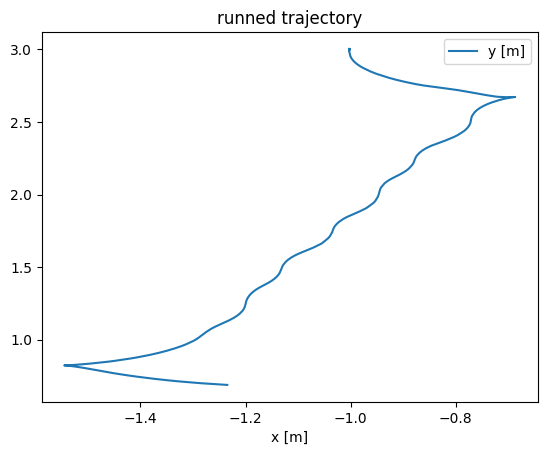

In [22]:
# df.drop(columns=["t [s]", "stage_obj", "accum_obj"]).plot()
df = df[df["t [s]"] > 0.0005]
df.plot(x="x [m]", y="y [m]", title="runned trajectory")

<Axes: title={'center': 'runned trajectory'}, xlabel='t [s]'>

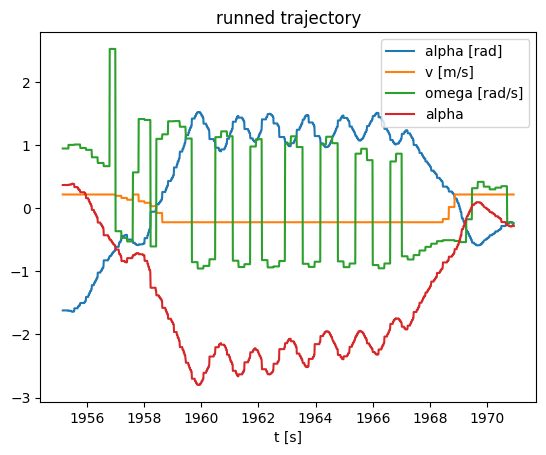

In [23]:
import numpy as np

df["alpha"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
# df.plot(x="t [s]", y="alpha", title="runned trajectory")
df.plot(x="t [s]", y=["alpha [rad]", "v [m/s]", "omega [rad/s]", "alpha"], title="runned trajectory")

<Axes: title={'center': 'object'}, xlabel='t [s]'>

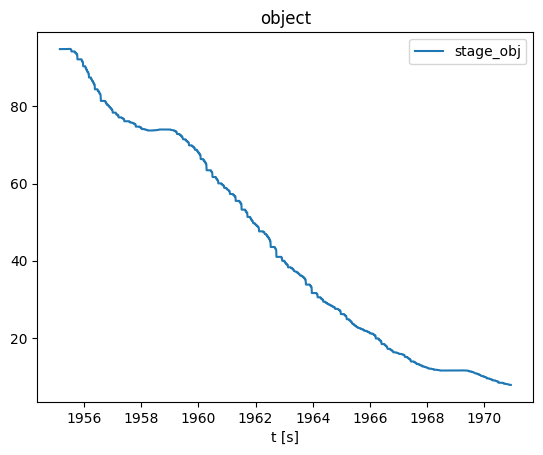

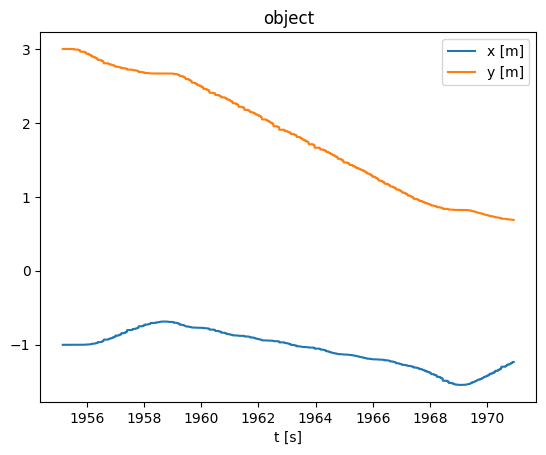

In [24]:
df
df.plot(x="t [s]", y=["stage_obj"], title="object")
df.plot(x="t [s]", y=["x [m]", "y [m]"], title="object")